<a href="https://colab.research.google.com/github/EbubeDelight/TensorFlow_Projects/blob/main/01_Neural_Network_Regression_with_TensorFlow_Exercise.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### 1. Create your own regression dataset (or make the one we created in "Create data to view and fit" bigger) and build fit a model to it.


In [295]:
import numpy as np
import pandas as pd
import tensorflow as tf
import matplotlib.pyplot as plt

In [296]:
# Creating the features
X = tf.range(1, 100, 2)

# Creating the labels
y = 2*X + 3
X, X.shape, X.dtype,  y, y.shape

(<tf.Tensor: shape=(50,), dtype=int32, numpy=
 array([ 1,  3,  5,  7,  9, 11, 13, 15, 17, 19, 21, 23, 25, 27, 29, 31, 33,
        35, 37, 39, 41, 43, 45, 47, 49, 51, 53, 55, 57, 59, 61, 63, 65, 67,
        69, 71, 73, 75, 77, 79, 81, 83, 85, 87, 89, 91, 93, 95, 97, 99],
       dtype=int32)>,
 TensorShape([50]),
 tf.int32,
 <tf.Tensor: shape=(50,), dtype=int32, numpy=
 array([  5,   9,  13,  17,  21,  25,  29,  33,  37,  41,  45,  49,  53,
         57,  61,  65,  69,  73,  77,  81,  85,  89,  93,  97, 101, 105,
        109, 113, 117, 121, 125, 129, 133, 137, 141, 145, 149, 153, 157,
        161, 165, 169, 173, 177, 181, 185, 189, 193, 197, 201], dtype=int32)>,
 TensorShape([50]))

In [297]:
# change the datatype of the variables
X = tf.cast((X), dtype= tf.float32)
y = tf.cast((y), dtype= tf.float32)

X.shape, X.dtype, y.shape, y.dtype

(TensorShape([50]), tf.float32, TensorShape([50]), tf.float32)

In [298]:
X[0].shape, y[0].shape

(TensorShape([]), TensorShape([]))

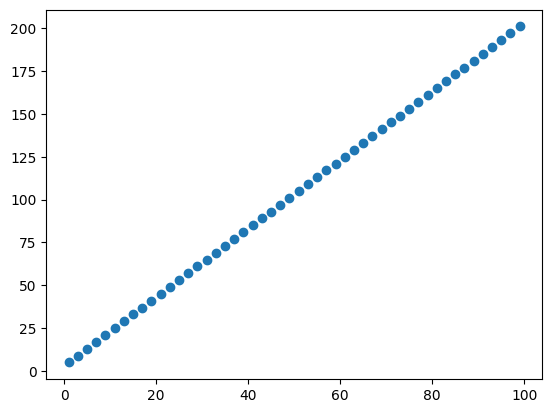

In [299]:
# Visualize it
plt.scatter(X, y);

In [300]:
X_train, X_test, y_train, y_test = X[:40], X[40:], y[:40], y[40:]
len(X_train), len(X_test), len(y_train), len(y_test)

(40, 10, 40, 10)

### **Building a model**

In [301]:
tf.random.set_seed(777)

# Creating a model
model_0 = tf.keras.Sequential([
    #tf.keras.layers.Dense(10),
    tf.keras.layers.Dense(1)
])

# Compile the model
model_0.compile(loss= tf.keras.losses.mae,
                optimizer = tf.keras.optimizers.SGD(),
                metrics = ["mse"]) # You can also replace ["mse"] with ["mae"]

# Fit the model
model_0.fit(tf.expand_dims(X_train, axis=-1), y_train, epochs=100)

Epoch 1/100
2/2 [==============================] - 0s 11ms/step - loss: 91.2477 - mse: 11064.1797
Epoch 2/100
2/2 [==============================] - 0s 13ms/step - loss: 59.3657 - mse: 4659.6504
Epoch 3/100
2/2 [==============================] - 0s 6ms/step - loss: 26.9620 - mse: 969.9321
Epoch 4/100
2/2 [==============================] - 0s 6ms/step - loss: 3.4115 - mse: 26.6398
Epoch 5/100
2/2 [==============================] - 0s 6ms/step - loss: 8.2481 - mse: 96.9590
Epoch 6/100
2/2 [==============================] - 0s 6ms/step - loss: 7.3030 - mse: 77.4580
Epoch 7/100
2/2 [==============================] - 0s 6ms/step - loss: 10.3291 - mse: 164.5315
Epoch 8/100
2/2 [==============================] - 0s 6ms/step - loss: 8.6307 - mse: 104.8856
Epoch 9/100
2/2 [==============================] - 0s 7ms/step - loss: 9.7898 - mse: 141.9897
Epoch 10/100
2/2 [==============================] - 0s 6ms/step - loss: 9.7648 - mse: 143.6815
Epoch 11/100
2/2 [==============================] - 0

In [302]:
model_0.summary()

Model: "sequential_35"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_97 (Dense)            (None, 1)                 2         
                                                                 
Total params: 2 (8.00 Byte)
Trainable params: 2 (8.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [303]:
# Evaluate the model
model_0.evaluate(X_test, y_test)

1/1 [==============================] - 0s 114ms/step - loss: 13.2089 - mse: 174.9259


[13.20890998840332, 174.9258575439453]

In [304]:
model_0.predict([17])

1/1 [==============================] - 0s 61ms/step


array([[32.321068]], dtype=float32)

In [305]:
# Make predictions
y_pred_0 = model_0.predict(X_test)
y_pred_0

1/1 [==============================] - 0s 45ms/step


array([[152.84273],
       [156.60904],
       [160.37534],
       [164.14163],
       [167.90794],
       [171.67424],
       [175.44054],
       [179.20685],
       [182.97314],
       [186.73946]], dtype=float32)

In [306]:
def mae(y_true, y_pred):
  return tf.metrics.mean_absolute_error(y_true = y_true,
                                        y_pred = tf.squeeze(y_pred))

def mse(y_true, y_pred):
  return tf.metrics.mean_squared_error(y_true = y_true,
                                     y_pred = tf.squeeze(y_pred))


In [307]:
mae_0 = mae(y_test, y_pred_0)
mse_0 = mse(y_test, y_pred_0)
mae_0, mse_0

(<tf.Tensor: shape=(), dtype=float32, numpy=13.20891>,
 <tf.Tensor: shape=(), dtype=float32, numpy=174.92586>)

In [308]:
y_test

<tf.Tensor: shape=(10,), dtype=float32, numpy=
array([165., 169., 173., 177., 181., 185., 189., 193., 197., 201.],
      dtype=float32)>

In [309]:
X_test.shape, y_test.shape

(TensorShape([10]), TensorShape([10]))

In [310]:
X_train.shape, y_train.shape

(TensorShape([40]), TensorShape([40]))

In [311]:
X_test.shape, y_pred_0.shape

(TensorShape([10]), (10, 1))

In [312]:
def plot_predictions(train_data = X_train,
                     train_label = y_train,
                     test_data = X_test,
                     test_label = y_test,
                     predictions = y_pred):
  plt.figure(figsize= (10, 7))

  # Plot training data
  plt.scatter(train_data, train_label, c="g", label= "Training data")

  # Plot testing data
  plt.scatter(test_data, test_label, c="r", label= "Testing data")

  # Plot predictions
  plt.scatter(test_data, predictions, c="b", label= "Predictions")
  plt.legend()


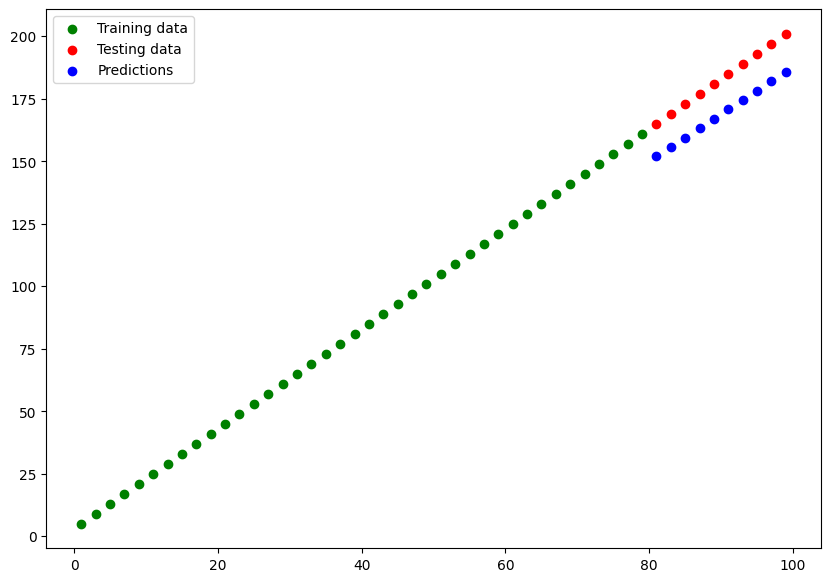

In [313]:
plot_predictions()

### 2. Try building a neural network with 4 Dense layers and fitting it to your own regression dataset, how does it perform?


In [314]:
# Set random seed
tf.random.set_seed(777)

# Create the model
model_1 = tf.keras.Sequential([
    tf.keras.layers.Dense(100),
    tf.keras.layers.Dense(10),
    tf.keras.layers.Dense(10),
    tf.keras.layers.Dense(1)
])

# Compile the model
model_1.compile(loss= tf.keras.losses.mae,
                optimizer= tf.keras.optimizers.SGD(),
                metrics= ["mse"]) # You can also replace ["mse"] with ["mae"]

# Fit the model
model_1.fit(tf.expand_dims(X_train, axis=-1), y_train, epochs = 100)

Epoch 1/100
2/2 [==============================] - 1s 12ms/step - loss: 78.9807 - mse: 8238.3145
Epoch 2/100
2/2 [==============================] - 0s 7ms/step - loss: 65.0158 - mse: 6219.4878
Epoch 3/100
2/2 [==============================] - 0s 7ms/step - loss: 269.8233 - mse: 106647.9766
Epoch 4/100
2/2 [==============================] - 0s 8ms/step - loss: 73.9246 - mse: 7128.1968
Epoch 5/100
2/2 [==============================] - 0s 8ms/step - loss: 4.1197 - mse: 57.0856
Epoch 6/100
2/2 [==============================] - 0s 8ms/step - loss: 253.9819 - mse: 97384.0469
Epoch 7/100
2/2 [==============================] - 0s 13ms/step - loss: 67.4848 - mse: 6172.4229
Epoch 8/100
2/2 [==============================] - 0s 7ms/step - loss: 76.2765 - mse: 7851.0205
Epoch 9/100
2/2 [==============================] - 0s 9ms/step - loss: 78.6737 - mse: 8093.5469
Epoch 10/100
2/2 [==============================] - 0s 8ms/step - loss: 58.4449 - mse: 4727.9312
Epoch 11/100
2/2 [=================

In [315]:
model_1.evaluate(X_test, y_test)

1/1 [==============================] - 0s 120ms/step - loss: 181.3502 - mse: 33019.8438


[181.35018920898438, 33019.84375]

In [316]:
y_pred_1 = model_1.predict(X_test)
y_pred_1

1/1 [==============================] - 0s 65ms/step


array([[1.6469723],
       [1.6476059],
       [1.6482395],
       [1.6488731],
       [1.6495067],
       [1.6501403],
       [1.6507739],
       [1.6514074],
       [1.652041 ],
       [1.6526746]], dtype=float32)

In [317]:
mae_1 = mae(y_test, y_pred_1)
mse_1 = mse(y_test, y_pred_1)
mae_1, mse_1

(<tf.Tensor: shape=(), dtype=float32, numpy=181.35019>,
 <tf.Tensor: shape=(), dtype=float32, numpy=33019.844>)

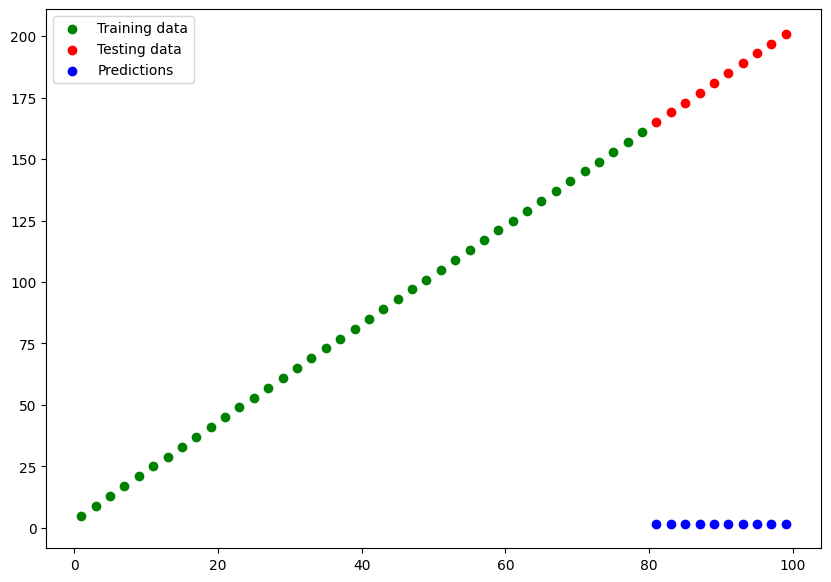

In [318]:
plot_predictions(predictions = y_pred_1)

In [319]:
# Set random seed
tf.random.set_seed(777)

# Create model_2
model_2 = tf.keras.Sequential([
    tf.keras.layers.Dense(100),
    tf.keras.layers.Dense(10),
    tf.keras.layers.Dense(10),
    tf.keras.layers.Dense(1)
])

# Compile the model
model_2.compile(loss= tf.keras.losses.mae,
                optimizer= tf.keras.optimizers.Adam(lr= 0.001),
                metrics= ["mse"]) # You can also replace ["mse"] with ["mae"]

# Fit the model
history = model_2.fit(tf.expand_dims(X_train, axis=-1), y_train, epochs = 100)

Epoch 1/100
2/2 [==============================] - 1s 12ms/step - loss: 96.4167 - mse: 12229.6416
Epoch 2/100
2/2 [==============================] - 0s 7ms/step - loss: 88.8279 - mse: 10359.6436
Epoch 3/100
2/2 [==============================] - 0s 7ms/step - loss: 81.4991 - mse: 8703.6045
Epoch 4/100
2/2 [==============================] - 0s 8ms/step - loss: 73.9435 - mse: 7141.6768
Epoch 5/100
2/2 [==============================] - 0s 7ms/step - loss: 66.5887 - mse: 5814.4609
Epoch 6/100
2/2 [==============================] - 0s 10ms/step - loss: 58.9093 - mse: 4524.5376
Epoch 7/100
2/2 [==============================] - 0s 7ms/step - loss: 51.4785 - mse: 3459.9067
Epoch 8/100
2/2 [==============================] - 0s 7ms/step - loss: 43.5305 - mse: 2448.9016
Epoch 9/100
2/2 [==============================] - 0s 9ms/step - loss: 35.5902 - mse: 1631.6348
Epoch 10/100
2/2 [==============================] - 0s 7ms/step - loss: 27.2949 - mse: 956.7708
Epoch 11/100
2/2 [==================

In [320]:
model_2.summary()

Model: "sequential_37"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_102 (Dense)           (None, 100)               200       
                                                                 
 dense_103 (Dense)           (None, 10)                1010      
                                                                 
 dense_104 (Dense)           (None, 10)                110       
                                                                 
 dense_105 (Dense)           (None, 1)                 11        
                                                                 
Total params: 1331 (5.20 KB)
Trainable params: 1331 (5.20 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [321]:
# Evaluate the model
model_2.evaluate(X_test, y_test)

1/1 [==============================] - 0s 124ms/step - loss: 1.6482 - mse: 2.7279


[1.648199439048767, 2.7278523445129395]

In [322]:
y_pred_2 = model_2.predict(X_test)
y_pred_2

1/1 [==============================] - 0s 68ms/step


array([[166.48172],
       [170.51872],
       [174.55573],
       [178.5927 ],
       [182.62968],
       [186.6667 ],
       [190.70367],
       [194.74068],
       [198.77766],
       [202.81468]], dtype=float32)

In [323]:
y_test

<tf.Tensor: shape=(10,), dtype=float32, numpy=
array([165., 169., 173., 177., 181., 185., 189., 193., 197., 201.],
      dtype=float32)>

In [324]:
mae_2 = mae(y_test, y_pred_2)
mse_2 = mse(y_test, y_pred_2)
mae_2, mse_2

(<tf.Tensor: shape=(), dtype=float32, numpy=1.6481949>,
 <tf.Tensor: shape=(), dtype=float32, numpy=2.7278368>)

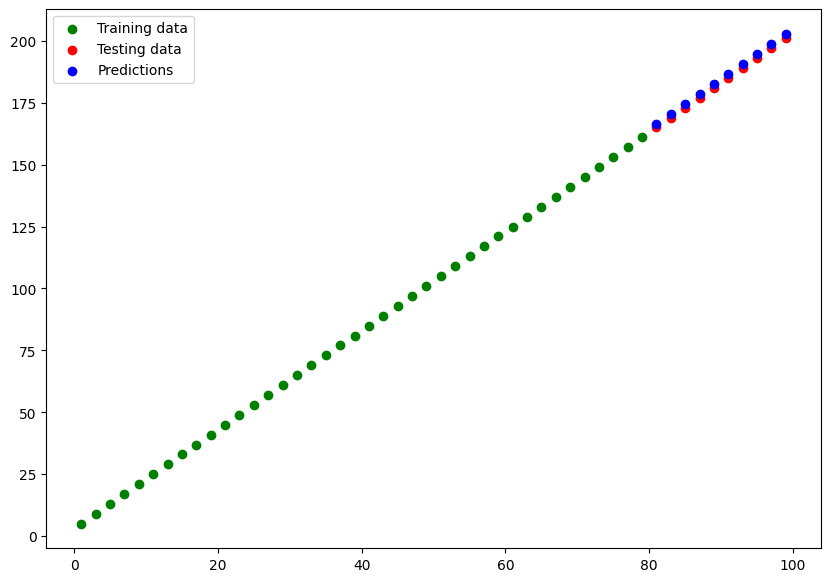

In [325]:
plot_predictions(predictions = y_pred_2);

Text(0.5, 0, 'epochs')

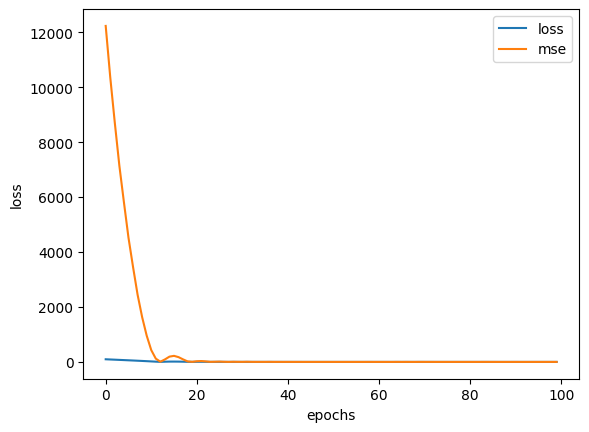

In [326]:
# Plot history AKA loss curve or training curve
pd.DataFrame(history.history).plot()
plt.ylabel("loss")
plt.xlabel("epochs")

In [327]:
compare_model_results = [["model_0", mae_0.numpy(), mae_0.numpy()],
                         ["model_1", mae_1.numpy(), mae_1.numpy()],
                         ["model_2", mae_2.numpy(), mae_2.numpy()]]
pd.DataFrame(compare_model_results, columns = ["model", "mae", "mse"])

,model,mae,mse
0,model_0,13.208910,13.208910
1,model_1,181.350189,181.350189
2,model_2,1.648195,1.648195


#### **Observation**
 The table above shows that **model_2** with **4 Dense layers** with **Adam** optimizer and **learning rate** of **0.001** performed better than model_0 and model_1.

### 3. Try and improve the results we got on the insurance dataset, some things you might want to try include:
* Building a larger model (how does one with 4 dense layers go?).
* Increasing the number of units in each layer.
* Lookup the documentation of Adam and find out what the first parameter is, what happens if you increase it by 10x?
* What happens if you train for longer (say 300 epochs instead of 200)?

In [335]:
insurance = pd.read_csv("https://raw.githubusercontent.com/stedy/Machine-Learning-with-R-datasets/master/insurance.csv")
insurance.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [336]:
insurance.shape

(1338, 7)

In [337]:
insurance.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [338]:
insurance.nunique(axis = 0).sort_values().to_frame()

,0
sex,2
smoker,2
region,4
children,6
age,47
bmi,548
charges,1337


In [355]:
# import sklearn classes
from sklearn.preprocessing import MinMaxScaler, OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.compose import make_column_transformer

# Create a column transformer
ct = make_column_transformer(
    (MinMaxScaler(), ["age", "bmi", "children"]),
    (OneHotEncoder(handle_unknown= "ignore"), ["sex", "smoker", "region"])
)

# split the dataset into X (features) and y(label)
X = insurance.drop("charges", axis=1)
y = insurance["charges"]

X.shape, y.shape

# Create train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size= 0.2, random_state= 777)

# Fit the column_transformer to the training data
ct.fit(X_train)

# Transform training and test data with normalization (MinMaxScalar and OneHotEncoding)
X_train_normalized = ct.transform(X_train)
X_test_normalized = ct.transform(X_test)

In [356]:
X_train_normalized[0]

array([0.54347826, 0.50929368, 0.4       , 0.        , 1.        ,
       1.        , 0.        , 0.        , 0.        , 1.        ,
       0.        ])

In [357]:
X_train.shape, X_train_normalized.shape

((1070, 6), (1070, 11))

In [358]:
X_test.shape, X_test_normalized.shape

((268, 6), (268, 11))

In [359]:
# Build a neural network model to fit on our normalized data
tf.random.set_seed(42)

# Remind myself of the insurance model I used earlier (to be improved)
# 1. Create the model
insurance_model_0 = tf.keras.Sequential([
    tf.keras.layers.Dense(100),
    tf.keras.layers.Dense(10),
    tf.keras.layers.Dense(1)
])

# 2. Compile the model
insurance_model_0.compile(loss = tf.keras.losses.mae,
                          optimizer = tf.keras.optimizers.Adam(lr= 0.001),
                          metrics = ["mae"])

# 3. Fit the model
insurance_model_0.fit(X_train_normalized, y_train, epochs= 200)

Epoch 1/200
34/34 [==============================] - 1s 2ms/step - loss: 13146.6064 - mae: 13146.6064
Epoch 2/200
34/34 [==============================] - 0s 2ms/step - loss: 13140.3691 - mae: 13140.3691
Epoch 3/200
34/34 [==============================] - 0s 2ms/step - loss: 13124.3301 - mae: 13124.3301
Epoch 4/200
34/34 [==============================] - 0s 2ms/step - loss: 13088.3271 - mae: 13088.3271
Epoch 5/200
34/34 [==============================] - 0s 2ms/step - loss: 13020.5391 - mae: 13020.5391
Epoch 6/200
34/34 [==============================] - 0s 2ms/step - loss: 12909.3906 - mae: 12909.3906
Epoch 7/200
34/34 [==============================] - 0s 2ms/step - loss: 12744.1553 - mae: 12744.1553
Epoch 8/200
34/34 [==============================] - 0s 2ms/step - loss: 12514.3418 - mae: 12514.3418
Epoch 9/200
34/34 [==============================] - 0s 2ms/step - loss: 12210.8027 - mae: 12210.8027
Epoch 10/200
34/34 [==============================] - 0s 2ms/step - loss: 11824.24

In [360]:
# Improving the insurance model by building a larger model

tf.random.set_seed(777)

# Let me add a fourth layer with 50 hidden units
# 1. Create the model
insurance_model_1 = tf.keras.Sequential([
    tf.keras.layers.Dense(100),
    tf.keras.layers.Dense(50),
    tf.keras.layers.Dense(10),
    tf.keras.layers.Dense(1)
])

# 2. Compile the model
insurance_model_1.compile(loss = tf.keras.losses.mae,
                          optimizer = tf.keras.optimizers.Adam(lr= 0.001),
                          metrics = ["mse"]
                          )

# 3. Fit the model
insurance_model_1.fit(X_train_normalized, y_train, epochs = 200)

Epoch 1/200
34/34 [==============================] - 1s 2ms/step - loss: 13138.8799 - mse: 316313952.0000
Epoch 2/200
34/34 [==============================] - 0s 2ms/step - loss: 13076.4805 - mse: 314656576.0000
Epoch 3/200
34/34 [==============================] - 0s 2ms/step - loss: 12790.5762 - mse: 307362944.0000
Epoch 4/200
34/34 [==============================] - 0s 2ms/step - loss: 11889.8711 - mse: 284425696.0000
Epoch 5/200
34/34 [==============================] - 0s 2ms/step - loss: 10110.8975 - mse: 239565728.0000
Epoch 6/200
34/34 [==============================] - 0s 2ms/step - loss: 8446.9043 - mse: 187949904.0000
Epoch 7/200
34/34 [==============================] - 0s 2ms/step - loss: 7886.5820 - mse: 157605360.0000
Epoch 8/200
34/34 [==============================] - 0s 2ms/step - loss: 7728.8887 - mse: 146582288.0000
Epoch 9/200
34/34 [==============================] - 0s 2ms/step - loss: 7571.2588 - mse: 143844256.0000
Epoch 10/200
34/34 [==============================

In [362]:
# Improving the insurance model by building a larger model

tf.random.set_seed(777)


# 1. Create the model
insurance_model_2 = tf.keras.Sequential([
    tf.keras.layers.Dense(100),
    tf.keras.layers.Dense(50),
    tf.keras.layers.Dense(10),
    tf.keras.layers.Dense(1)
])

# 2. Compile the model
insurance_model_2.compile(loss = tf.keras.losses.mae,
                          optimizer = tf.keras.optimizers.Adam(lr= 0.01), # Let me increase the learning rate (lr) by 10X
                          metrics = ["mse"]
                          )

# 3. Fit the model
insurance_model_2.fit(X_train_normalized, y_train, epochs = 300)

Epoch 1/300
34/34 [==============================] - 3s 5ms/step - loss: 13141.6465 - mse: 316389280.0000
Epoch 2/300
34/34 [==============================] - 0s 4ms/step - loss: 13088.1777 - mse: 314985760.0000
Epoch 3/300
34/34 [==============================] - 0s 3ms/step - loss: 12828.4346 - mse: 308397184.0000
Epoch 4/300
34/34 [==============================] - 0s 3ms/step - loss: 11989.0000 - mse: 287027872.0000
Epoch 5/300
34/34 [==============================] - 0s 4ms/step - loss: 10267.2793 - mse: 243886176.0000
Epoch 6/300
34/34 [==============================] - 0s 3ms/step - loss: 8561.2334 - mse: 192233584.0000
Epoch 7/300
34/34 [==============================] - 0s 3ms/step - loss: 7937.3403 - mse: 159397088.0000
Epoch 8/300
34/34 [==============================] - 0s 3ms/step - loss: 7781.0645 - mse: 147597248.0000
Epoch 9/300
34/34 [==============================] - 0s 3ms/step - loss: 7627.6851 - mse: 145547168.0000
Epoch 10/300
34/34 [==============================

In [363]:
# Evaluate the insurance_model_2
insurance_model_2.evaluate(X_test_normalized, y_test)

9/9 [==============================] - 0s 2ms/step - loss: 3483.5742 - mse: 50534700.0000


[3483.57421875, 50534700.0]

In [364]:
# Evaluate the insurance_model_2
insurance_model_0.evaluate(X_test_normalized, y_test)

9/9 [==============================] - 0s 2ms/step - loss: 3484.8757 - mae: 3484.8757


[3484.875732421875, 3484.875732421875]

### **Conclusion:**
I did  not notice any significant improvement in the peformance of `insurance_model_2` from `insurance_model_0` after adjusting the learning rate, number of epochs, and adding extra layer.